In [8]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import normalize
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

image_directory='DS_IDRID/'

no_diabetic_images=os.listdir(image_directory+ 'no')
yes_diabetic_images=os.listdir(image_directory+ 'yes')
dataset=[]
label=[]


In [4]:
print(no_diabetic_images)


['100_IDRiD_074_-1.jpg', '102_IDRiD_078_-0.jpg', '103_IDRiD_393_-0.jpg', '104_IDRiD_159_-0.jpg', '106_IDRiD_147_-0.jpg', '107_IDRiD_407_-2.jpg', '108_IDRiD_381_-0.jpg', '10_IDRiD_100_-2.jpg', '110_IDRiD_348_-2.jpg', '111_IDRiD_248_-2.jpg', '112_IDRiD_155_-0.jpg', '113_IDRiD_082_-2.jpg', '114_IDRiD_360_-2.jpg', '115_IDRiD_260_-2.jpg', '116_IDRiD_303_-2.jpg', '117_IDRiD_163_-0.jpg', '11_IDRiD_028_-2.jpg', '121_IDRiD_311_-2.jpg', '123_IDRiD_171_-0.jpg', '124_IDRiD_071_-2.jpg', '125_IDRiD_211_-0.jpg', '127_IDRiD_256_-1.jpg', '128_IDRiD_063_-2.jpg', '12_IDRiD_090_-0.jpg', '132_IDRiD_182_-0.jpg', '133_IDRiD_335_-0.jpg', '134_IDRiD_235_-0.jpg', '136_IDRiD_128_-2.jpg', '137_IDRiD_203_-1.jpg', '138_IDRiD_136_-2.jpg', '139_IDRiD_281_-2.jpg', '13_IDRiD_059_-2.jpg', '140_IDRiD_227_-0.jpg', '143_IDRiD_190_-0.jpg', '144_IDRiD_047_-2.jpg', '145_IDRiD_059_-2.jpg', '147_IDRiD_293_-2.jpg', '148_IDRiD_124_-2.jpg', '149_IDRiD_244_-0.jpg', '14_IDRiD_024_-2.jpg', '150_IDRiD_102_-2.jpg', '155_IDRiD_061_-2.jp

In [11]:

INPUT_SIZE=32

for i,image_name in enumerate(no_diabetic_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+ 'no/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i,image_name in enumerate(yes_diabetic_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+ 'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)

label=np.array(label)

x_train, x_test, y_train, y_test= train_test_split(dataset,label, test_size=0.2)

#reshape = (n, image_width, image_height, n_channel)  

#print(x_train.shape)
#print(y_train.shape)

#print(x_test.shape)
#print(y_test.shape)

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test=tf.keras.utils.to_categorical(y_test, num_classes=2)


model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

          
#Binary CrossEntropy= 1, sigmoid
#categorical Cross Entropy= 2, softmax
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])        
model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=10, verbose=1, epochs=100, shuffle= False)
#model.save('BrainTumor10epochsCategorical.h5')


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [30]:
history=model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=100, verbose=1, epochs=100, shuffle= False)


Epoch 1/100
42/42 [==============================] - 0s 7ms/step - loss: 3.2499e-04 - accuracy: 1.0000 - val_loss: 4.6183 - val_accuracy: 0.6635
Epoch 2/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.6302 - val_accuracy: 0.6538
Epoch 3/100
42/42 [==============================] - 0s 7ms/step - loss: 2.0176e-04 - accuracy: 1.0000 - val_loss: 4.6438 - val_accuracy: 0.6538
Epoch 4/100
42/42 [==============================] - 0s 7ms/step - loss: 3.6434e-04 - accuracy: 1.0000 - val_loss: 4.6655 - val_accuracy: 0.6538
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.6519 - val_accuracy: 0.6442
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 9.9561e-04 - accuracy: 1.0000 - val_loss: 4.6445 - val_accuracy: 0.6346
Epoch 7/100
42/42 [==============================] - 0s 7ms/step - loss: 6.3260e-04 - accuracy: 1.0000 - val_loss: 4.6930 - val_accuracy: 

In [24]:
history.history??

In [16]:
print(model)

In [17]:
model.save('Diabetic_100epochsCategorical.h5')

In [18]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

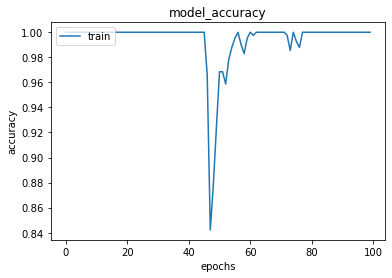

In [31]:
plt.plot(history.history['accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

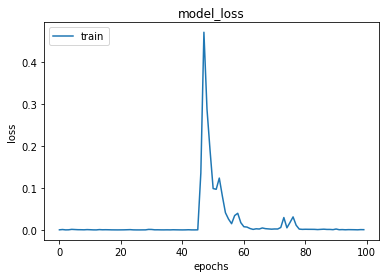

In [34]:
plt.plot(history.history['loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

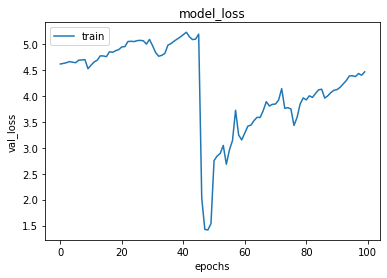

In [35]:
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('val_loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show()

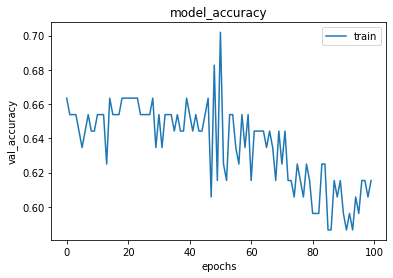

In [36]:
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper right') 
plt.show()